**Задание**

Цель: применить на практике базовые ансамблевые методы \
Описание задания:\
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

**1.Получите данные и загрузите их в рабочую среду.\
2.Подготовьте датасет к обучению моделей.\
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.\
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).**

In [1]:
import pandas as pd
import numpy as np
import math

import seaborn as sns 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Смущают нулевые показатели кровяного давления и холестерина в крови. 

In [5]:
heart_df[heart_df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [6]:
heart_df[heart_df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [7]:
heart_df['HeartDisease'][heart_df['Cholesterol'] == 0.0].value_counts()

1    152
0     20
Name: HeartDisease, dtype: int64

Возможно, это просто очень маленькие значения, близкие к нулю, по распределению целевой переменной видно, что у большинства пациентов с такими значениями не выявлена болезнь сердца. Это важно для последующего прогнозирования.

Удалим строку пациента с нулевым давлением. Хотя, возможно, это лишнее действие.

In [8]:
heart_df = heart_df.loc[heart_df['RestingBP'] != 0.0]

In [9]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Построим корреляционную матрицу

<ipython-input-10-3790fef44ec3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(heart_df.corr())
<ipython-input-10-3790fef44ec3>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = heart_df.corr()


[Text(0.5, 1.0, 'Корреляционная матрица')]

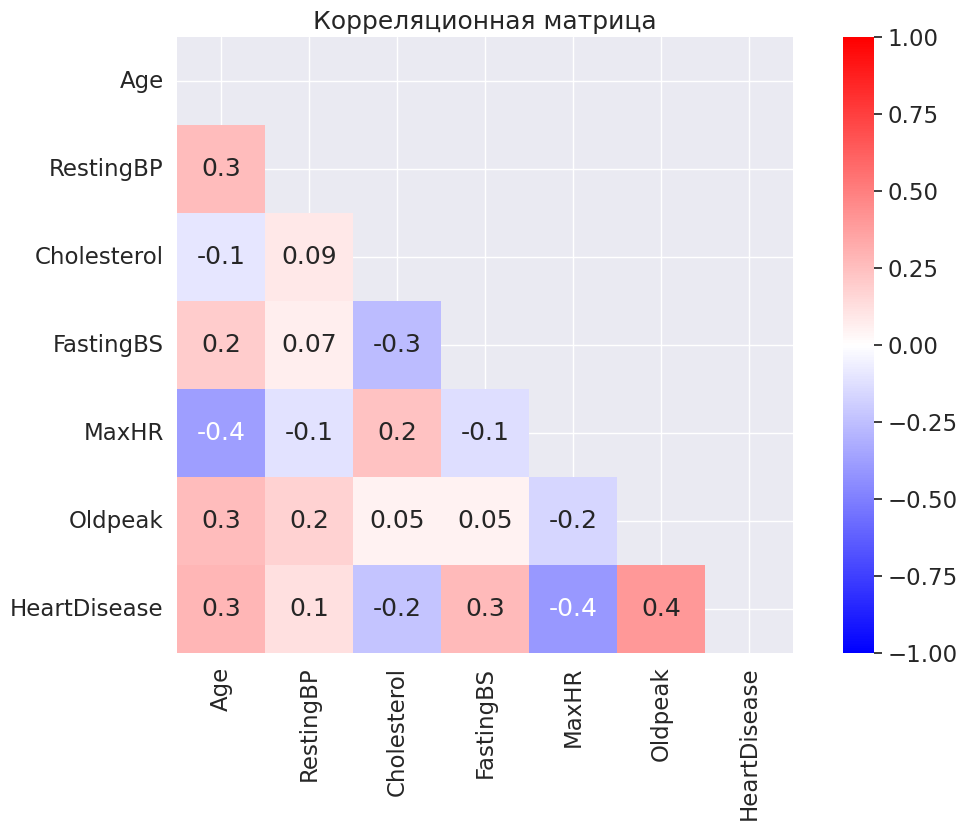

In [10]:
sns.set(rc={'figure.figsize':(13, 8)}, font_scale = 1.5)

matrix = np.triu(heart_df.corr())

corr = heart_df.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True, fmt ='.1g',
            vmin = -1, vmax = 1, center = 0,
            mask = matrix,
            cmap= 'bwr', square=True).set(title = 'Корреляционная матрица')

Коллинеарных признаков нет.

Преобразуем категориальные признаки. 

In [11]:
heart_df['ExerciseAngina'].value_counts()

N    546
Y    371
Name: ExerciseAngina, dtype: int64

Для признаков Sex и ExerciseAngina можно использовать LabelEncoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
le2 = LabelEncoder()

In [13]:
le1.fit(heart_df['Sex'])
le2.fit(heart_df['ExerciseAngina'])

LabelEncoder()

In [14]:
le1.classes_

array(['F', 'M'], dtype=object)

In [15]:
le2.classes_

array(['N', 'Y'], dtype=object)

In [16]:
heart_df['Sex'] = le1.transform(heart_df['Sex'])
heart_df['ExerciseAngina'] = le2.transform(heart_df['ExerciseAngina'])
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


Остальные категориальные признаки преобразуем с помощью get_dummies

In [17]:
selectedColumns = heart_df.select_dtypes(include=['object']).columns
X = pd.get_dummies (heart_df.loc[ : , heart_df.columns != 'HeartDisease'], columns = selectedColumns)
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1


In [18]:
y = heart_df['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

**3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.\
4.Обучите дерево решений на обучающем множестве. Используйте следующие модели:\
a) tree.DecisionTreeClassifier\
b) ensemble.RandomForestClassifier\
5.Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.\
6.Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
DT_model = DecisionTreeClassifier(random_state = 42)

params = {'max_depth':[2,3,5,10,20,30,50,70],
         'min_samples_leaf':[5,10,20,30,50], 
         'max_features': [0.2,0.25,0.3,0.35,0.4,0.45,0.5]}

grid_search = GridSearchCV(estimator = DT_model, param_grid = params, verbose = 1, n_jobs = -1, scoring = 'recall')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 50, 70],
                         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
                         'min_samples_leaf': [5, 10, 20, 30, 50]},
             scoring='recall', verbose=1)

In [22]:
DT_model_best = grid_search.best_estimator_

In [23]:
y_test_pred = DT_model_best.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        72
           1       0.85      0.85      0.85       112

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



In [26]:
RF_model = RandomForestClassifier(random_state = 42, n_jobs = -1)

params = {'max_depth':[2, 3, 5, 10, 20, 30, 50, 70],
         'min_samples_leaf':[5, 10, 20, 30, 50],
         'n_estimators':[200], 
         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}

grid_search = GridSearchCV(estimator = RF_model, param_grid = params, verbose = 1, n_jobs =-1, scoring = 'recall')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 50, 70],
                         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
                         'min_samples_leaf': [5, 10, 20, 30, 50],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

In [27]:
RF_model_best = grid_search.best_estimator_

In [28]:
y_test_pred = RF_model_best.predict(X_test)

In [29]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        72
           1       0.89      0.88      0.88       112

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184



In [30]:
feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Importance':RF_model_best.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance = feature_importance.set_index('Feature')

[Text(0.5, 1.0, 'Важность признаков')]

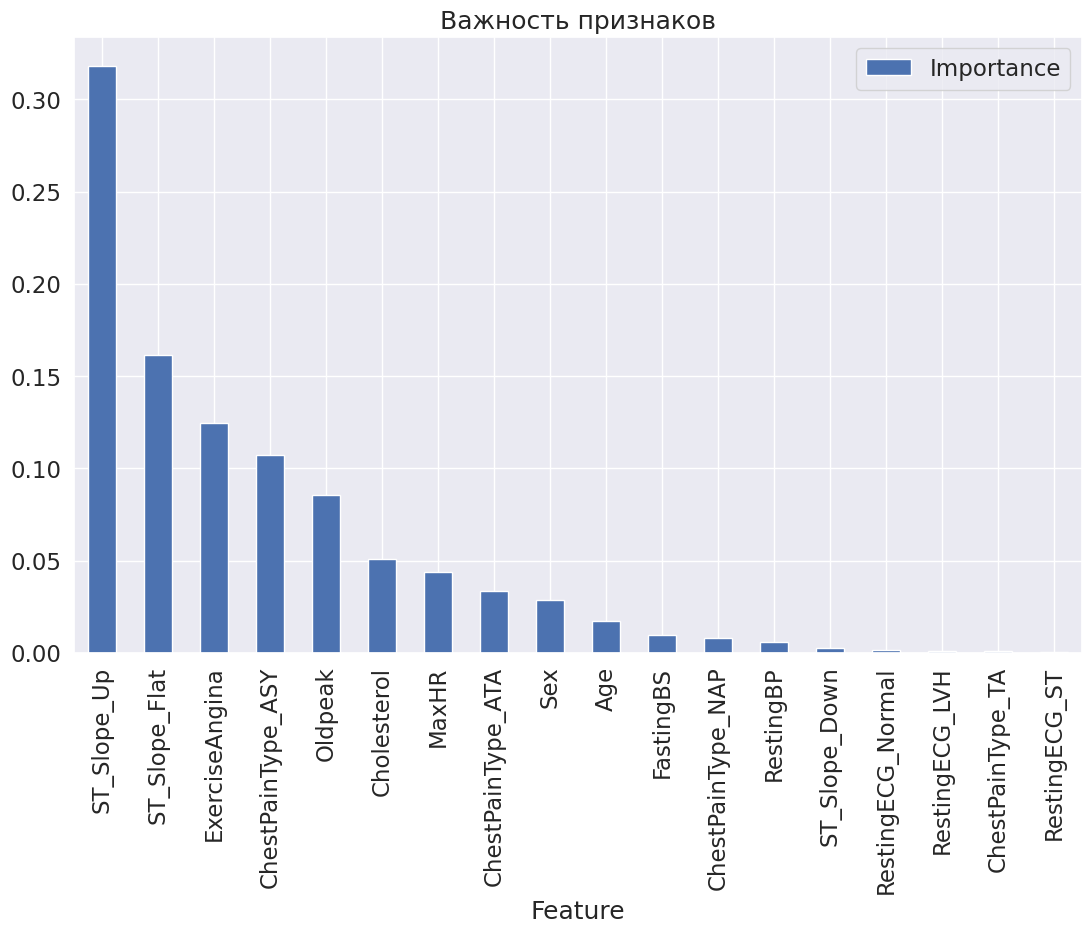

In [31]:
feature_importance.plot(kind='bar').set(title = 'Важность признаков')

**7.Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.\
a) Повторите п. 5**

In [32]:
from sklearn.ensemble import BaggingClassifier

In [33]:
BC_model = BaggingClassifier(random_state = 42, n_jobs = -1)

params = {'n_estimators':[200],
          'max_samples':[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.7],
          'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.7]}

grid_search = GridSearchCV(estimator = BC_model, param_grid = params, verbose = 1, n_jobs = -1, scoring = 'recall')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(estimator=BaggingClassifier(n_jobs=-1, random_state=42), n_jobs=-1,
             param_grid={'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                                          0.7],
                         'max_samples': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
                                         0.7],
                         'n_estimators': [200]},
             scoring='recall', verbose=1)

In [34]:
BC_model_best = grid_search.best_estimator_

In [35]:
y_test_pred = BC_model_best.predict(X_test)

In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        72
           1       0.90      0.87      0.88       112

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184



**8.Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.\
a) Повторите п. 5**

In [37]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
X_scaled.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.432206,0.516309,0.414627,0.824126,-0.551733,1.383339,-0.824310,-0.831502,-1.085425,2.073784,-0.531524,-0.22981,-0.507826,0.815013,-0.490781,-0.271607,-1.001091,1.149573
1,-0.478057,-1.936826,1.526360,-0.174164,-0.551733,0.754736,-0.824310,0.106251,-1.085425,-0.482210,1.881384,-0.22981,-0.507826,0.815013,-0.490781,-0.271607,0.998910,-0.869888
2,-1.750256,0.516309,-0.141240,0.769174,-0.551733,-1.523953,-0.824310,-0.831502,-1.085425,2.073784,-0.531524,-0.22981,-0.507826,-1.226974,2.037569,-0.271607,-1.001091,1.149573
3,-0.584074,-1.936826,0.303453,0.137229,-0.551733,-1.131075,1.213136,0.575128,0.921298,-0.482210,-0.531524,-0.22981,-0.507826,0.815013,-0.490781,-0.271607,0.998910,-0.869888
4,0.052026,0.516309,0.970493,-0.036784,-0.551733,-0.581047,-0.824310,-0.831502,-1.085425,-0.482210,1.881384,-0.22981,-0.507826,0.815013,-0.490781,-0.271607,-1.001091,1.149573


In [39]:
estimators = [('DT', DecisionTreeClassifier(random_state = 42)),
              ('RF', RandomForestClassifier(n_estimators = 10, random_state = 42)),
              ('SVR', LinearSVC(random_state = 42))]

stack_models = StackingClassifier(estimators = estimators)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y, random_state = 42)
stack_models.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

StackingClassifier(estimators=[('DT', DecisionTreeClassifier(random_state=42)),
                               ('RF',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('SVR', LinearSVC(random_state=42))])

In [40]:
y_test_pred = stack_models.predict(X_test)

In [41]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       103
           1       0.87      0.90      0.88       127

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



Ппробуем градиентный бустинг из библиотеки sklearn

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
GB_model = GradientBoostingClassifier(random_state = 42)

params = {'max_depth':[2, 3, 5, 10, 20, 30, 50, 70],
         'min_samples_leaf':[5, 10, 20, 30, 50],
         'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5], 
         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]}

grid_search = GridSearchCV(estimator = GB_model, param_grid = params, verbose = 1, n_jobs = -1, scoring ='recall')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits


GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [2, 3, 5, 10, 20, 30, 50, 70],
                         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
                         'min_samples_leaf': [5, 10, 20, 30, 50]},
             scoring='recall', verbose=1)

In [44]:
GB_model_best = grid_search.best_estimator_

In [45]:
y_test_pred = GB_model_best.predict(X_test)

In [46]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       103
           1       0.91      0.90      0.90       127

    accuracy                           0.90       230
   macro avg       0.89      0.90      0.89       230
weighted avg       0.90      0.90      0.90       230



Попробуем градиентный бустинг из библиотеки catboost

In [ ]:
!pip install catboost

In [48]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier(random_state = 42)
cat.fit(X_train, y_train)

In [50]:
y_test_pred = cat.predict(X_test)

In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       103
           1       0.91      0.91      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



**9.Сформулируйте выводы по проделанной работе.\
a) Сравните метрики построенных моделей.\
b) Напишите свое мнение, какая модель наилучшая и почему.**

In [58]:
data = {'model': ['DecisionTreeClassifier', 'RandomForestClassifier', 'BaggingClassifier',
                  'StackingClassifier', 'GradientBoostingClassifier', 'CatBoostClassifier'],
        'precision.1': [0.85, 0.89, 0.90, 0.87, 0.91, 0.91],
        'recall.1': [0.85, 0.88, 0.87, 0.90, 0.90, 0.91],
        'f1-score.1': [0.85, 0.88, 0.88, 0.88, 0.90, 0.91],
        'accuracy': [0.82, 0.86, 0.86, 0.87, 0.90, 0.90],} 
 
df_compare_models = pd.DataFrame(data)

df_compare_models

,model,precision.1,recall.1,f1-score.1,accuracy
0,DecisionTreeClassifier,0.85,0.85,0.85,0.82
1,RandomForestClassifier,0.89,0.88,0.88,0.86
2,BaggingClassifier,0.90,0.87,0.88,0.86
3,StackingClassifier,0.87,0.90,0.88,0.87
4,GradientBoostingClassifier,0.91,0.90,0.90,0.90
5,CatBoostClassifier,0.91,0.91,0.91,0.90


Наилучшей оказалась модель catboost. Учитывая особенности датасета, в результате наиболее важен класс 1, потому как он указывает на вероятность болезни сердца. И наиболее значимой тут является полнота. Если сравнивать, например, модели StackingClassifier и BaggingClassifier, то первая выигрывет по показателю полноты. И RandomForestClassifier выигрывает у BaggingClassifier по этому показателю.